# Numerical Exercise 12

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import activations
from tensorflow.keras import backend as K

seed = 0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)




2024-06-20 14:09:37.404266: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) 
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape) 
print('Y_test shape:', Y_test.shape)


if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('Before to_categorical: ')
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('Train samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)
Before to_categorical: 
X_train shape:  (60000, 28, 28, 1)
Y_train shape:  (60000,)
Train samples:  60000
Test samples:  10000
After to_categorical: 
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


## Exercise 12.2
Change the architecture of your DNN using convolutional layers. Use Conv2D, MaxPooling2D, Dropout, but also do not forget Flatten, a standard Dense layer and soft-max in the end. I have merged step 2 and 3 in the following definition of create_CNN() that you should complete:

## Resolution
We will use 

In [3]:
def create_DNN():
    model = Sequential()
    # 10 filters as we have 10 digits
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, 5, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(optimizer='sgd'):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adagrad',
                  metrics=['acc'])
    return model


In [4]:
# training parameters
batch_size = 32
epochs = 8


In [5]:
# create the convolutional deep neural net
model = compile_model()

# train CDNN and store training info in history
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(X_test, Y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-20 14:09:39.122846: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 14:09:39.130689: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-20 14:09:39.130948: I external

Epoch 1/8


I0000 00:00:1718892579.991144  404295 service.cc:145] XLA service 0x7f56fc0064f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718892579.991172  404295 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-06-20 14:09:40.017781: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-20 14:09:40.087171: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 150/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.0779 - loss: 2.3135

I0000 00:00:1718892581.680727  404295 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3120 - loss: 2.0169 - val_acc: 0.8568 - val_loss: 0.6110
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7983 - loss: 0.6717 - val_acc: 0.9049 - val_loss: 0.3531
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8616 - loss: 0.4603 - val_acc: 0.9233 - val_loss: 0.2759
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8885 - loss: 0.3770 - val_acc: 0.9328 - val_loss: 0.2349
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9031 - loss: 0.3279 - val_acc: 0.9396 - val_loss: 0.2089
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9095 - loss: 0.2986 - val_acc: 0.9456 - val_loss: 0.1908
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9193 - loss: 0.2731 - val_acc: 0.9489 - val_loss: 0.1766
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9238 - loss: 0.2574 - val_acc: 0.9513 - val_loss: 0.1649


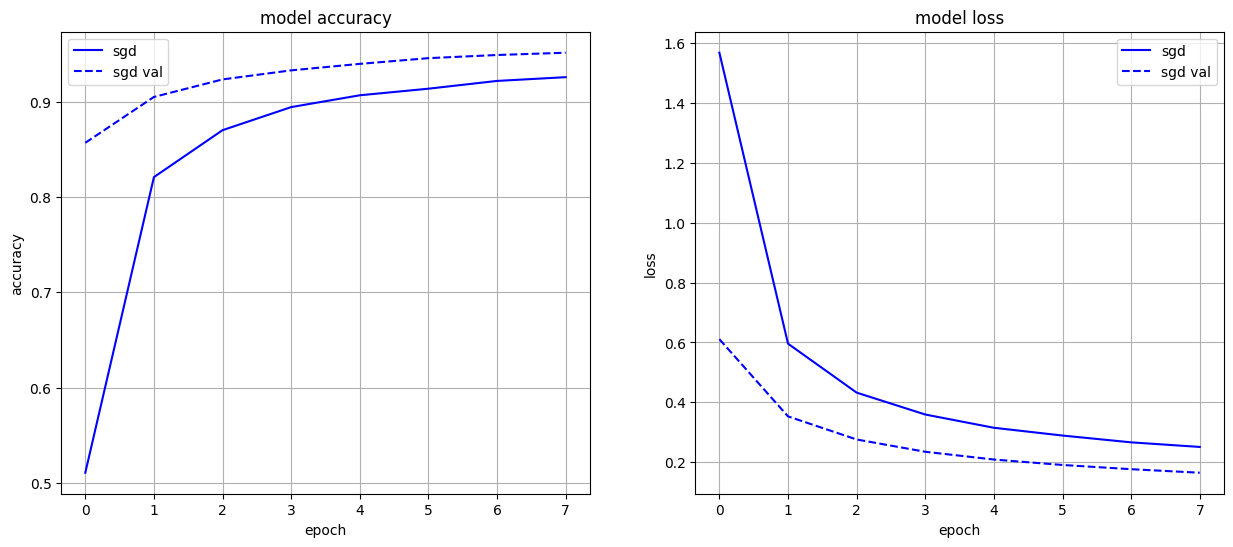

In [6]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history.history['acc'], label='sgd', color='blue')
plt.plot(history.history['val_acc'], label='sgd val', color='blue', linestyle='--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'], label='sgd', color='blue')
plt.plot(history.history['val_loss'], label='sgd val', color='blue', linestyle='--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


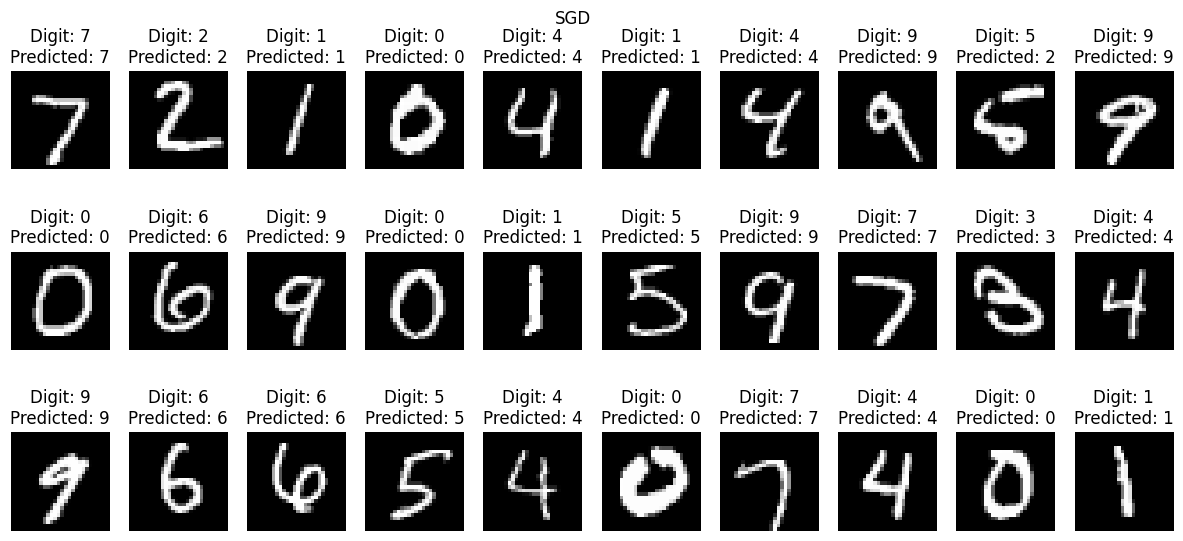

In [7]:
# plot some predictions

predictions = model.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (15,6))
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.suptitle('SGD')
plt.show()


### Exercise 12.3
